In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
sparkling_df = pd.read_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 7- Time Series Forecasting\Week- 4 - Project\Datasets\Sparkling.csv', parse_dates= ['YearMonth'])
sparkling_df.head()

,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471


In [3]:
sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Sparkling  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [4]:
sparkling_df.set_index('YearMonth', inplace= True)

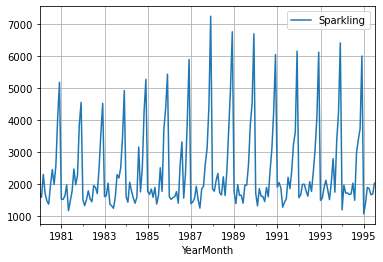

In [5]:
sparkling_df.plot(grid= True);

In [6]:
sparkling_df.isnull().sum()

Sparkling    0
dtype: int64

## Exploratory Data Analysis

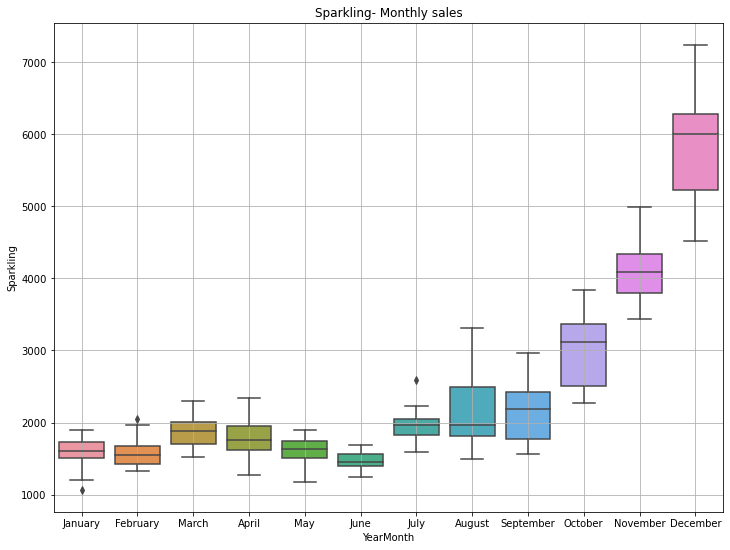

In [65]:
# Plotting boxplots
plt.figure(figsize= (12,9))
sns.boxplot(x = sparkling_df.index.month_name(), y = sparkling_df['Sparkling'])
plt.title('Sparkling- Monthly sales')
plt.grid();

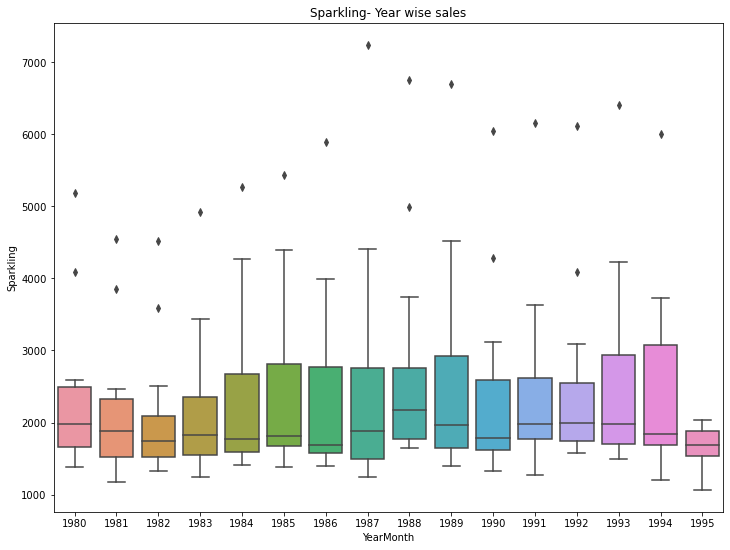

In [66]:
# Yearly distribution of sales of respective wines
plt.figure(figsize= (12,9))
sns.boxplot(x = sparkling_df.index.year, y = sparkling_df['Sparkling'])
plt.title('Sparkling- Year wise sales');

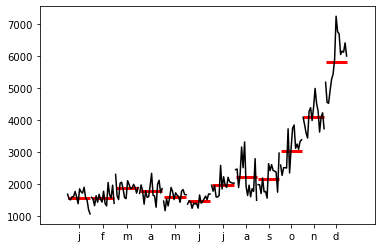

In [9]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(sparkling_df['Sparkling']);

As we can see from above plots, sales of both wines increase as year-end approaches. Also, it is worth noting that sales figures of 'Rose' has been declining, while those of 'Sparkling' have remained the same.

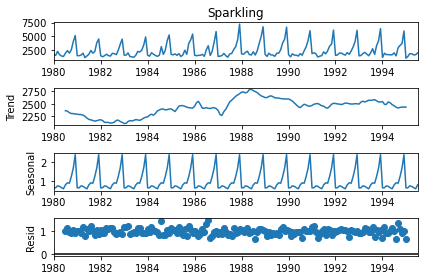

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_model = seasonal_decompose(sparkling_df['Sparkling'], model= 'multiplicative', period= 12)
decompose_model.plot();

In [11]:
sparkling_df['1980-07-01':'1991-01-01']

,Sparkling
YearMonth,
1980-07-01,1966
1980-08-01,2453
1980-09-01,1984
1980-10-01,2596
1980-11-01,4087
...,...
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286


In [12]:
# Splitting the data into training and testing data
# The test data should start in 1991
test = sparkling_df['1991-01-01':]
train = sparkling_df[:'1991-01-01']

In [13]:
test_data_length = test.shape[0]
print('Percentage of test data is {} %'.format(round((test_data_length/sparkling_df.shape[0])*100),3))

Percentage of test data is 29 %


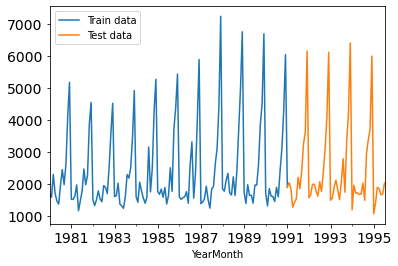

In [14]:
# Visualizing the training and testing data
train['Sparkling'].plot(fontsize= 14, label = 'Sparkling Train data')
test['Sparkling'].plot(fontsize= 14, label = 'Sparkling Test data')
plt.legend();

## Building models 

### Naive model

In [15]:
naive_train = train.copy()
naive_test = test.copy()

# To check the last value
naive_train.tail()

,Sparkling
YearMonth,
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047
1991-01-01,1902


Since Naive model just re-predicts the last value, 1902 will be the predicted value of 'Sparkling'.

In [16]:
# Prediction
naive_test['Sparkling_Pred'] = 1902

In [17]:
# Model evaluation
from sklearn.metrics import mean_squared_error
naive_rmse = mean_squared_error(test['Sparkling'], naive_test['Sparkling_Pred'], squared= False)
print('RMSE for Naive model for Sparkling: {}'.format(round(naive_rmse),3))

RMSE for Naive model for Sparkling: 1369


In [18]:
# Creating a dataframe to store all RMSE values and compare them later
final_rmse_result_df = pd.DataFrame({'RMSE': [naive_rmse]}, index= ['Naive model'])

In [19]:
final_rmse_result_df

,RMSE
Naive model,1368.563381


### Simple Avg model

In [20]:
# Copying train and test datasets
simple_avg_train = train.copy()
simple_avg_test = test.copy()

# Prediction
simple_avg_test['Mean_forecast'] = simple_avg_train['Sparkling'].mean()

In [21]:
# Evaluation
mean_rmse = mean_squared_error(test['Sparkling'], simple_avg_test['Mean_forecast'], squared= False)
print('RMSEs for Simple Avg model for Rose: {}'.format(round(mean_rmse, 3)))

RMSEs for Simple Avg model for Rose: 1275.074


In [22]:
# Creating a dataframe to store RMSE values and concat them into the final result dataframe to compare
mean_rmse_result = pd.DataFrame({'RMSE': [mean_rmse]}, index= ['Simple Mean Model'])
final_rmse_result_df = pd.concat([final_rmse_result_df, mean_rmse_result])
final_rmse_result_df

,RMSE
Naive model,1368.563381
Simple Mean Model,1275.073671


In [23]:
# Copying entire dataset
ma_data = sparkling_df.copy()

# Taking MA using rolling function for 'Sparkling'
ma_sparkling_2pt = ma_data['Sparkling'].rolling(2).mean()
ma_sparkling_4pt = ma_data['Sparkling'].rolling(4).mean()
ma_sparkling_6pt = ma_data['Sparkling'].rolling(6).mean()
ma_sparkling_9pt = ma_data['Sparkling'].rolling(9).mean()


ma_data['Sparkling_Trailing_2'] = ma_sparkling_2pt
ma_data['Sparkling_Trailing_4'] = ma_sparkling_4pt
ma_data['Sparkling_Trailing_6'] = ma_sparkling_6pt
ma_data['Sparkling_Trailing_9'] = ma_sparkling_9pt

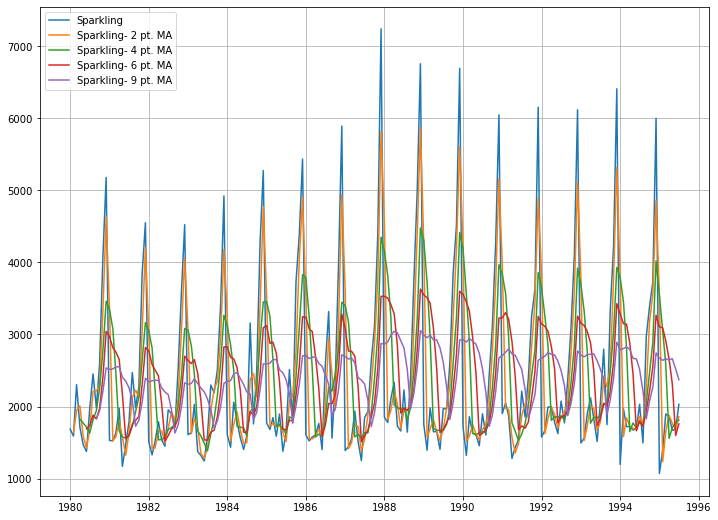

In [24]:

plt.figure(figsize= (12,9))
plt.plot(ma_data['Sparkling'], label= 'Sparkling')
plt.plot(ma_data['Sparkling_Trailing_2'], label= 'Sparkling- 2 pt. MA')
plt.plot(ma_data['Sparkling_Trailing_4'], label= 'Sparkling- 4 pt. MA')
plt.plot(ma_data['Sparkling_Trailing_6'], label= 'Sparkling- 6 pt. MA')
plt.plot(ma_data['Sparkling_Trailing_9'], label= 'Sparkling- 9 pt. MA')
plt.legend(loc= 'best')
plt.grid();

Clearly, 2 pt. MA mimics the test data the best. While, 9 pt. MA is the smoothest.

In [25]:
#Creating train and test set 
ma_test = ma_data['1991-01-01':]
ma_train = ma_data[:'1991-01-01']

In [26]:
# Evaluation
rmse_test_2 = mean_squared_error(test['Sparkling'],ma_test['Sparkling_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Sparkling Data,  RMSE is %3.3f" %(rmse_test_2))

rmse_test_4 = mean_squared_error(test['Sparkling'],ma_test['Sparkling_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Sparkling Data,  RMSE is %3.3f" %(rmse_test_4))

rmse_test_6 = mean_squared_error(test['Sparkling'],ma_test['Sparkling_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Sparkling Data,  RMSE is %3.3f" %(rmse_test_6))

rmse_test_9 = mean_squared_error(test['Sparkling'],ma_test['Sparkling_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Sparkling Data,  RMSE is %3.3f " %(rmse_test_9))

For 2 point Moving Average Model forecast on the Sparkling Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Sparkling Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Sparkling Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Sparkling Data,  RMSE is 1346.278 


In [27]:
keys = ['MA_2pt', 'MA_4pt', 'MA_6pt', 'MA_9pt']
ma_rmse_result = pd.DataFrame({'RMSE': [rmse_test_2, rmse_test_4, rmse_test_6, rmse_test_9]}, index= keys)
ma_rmse_result

,RMSE
MA_2pt,813.400684
MA_4pt,1156.589694
MA_6pt,1283.927428
MA_9pt,1346.278315


In [28]:
final_rmse_result_df = pd.concat([final_rmse_result_df, ma_rmse_result])
final_rmse_result_df

,RMSE
Naive model,1368.563381
Simple Mean Model,1275.073671
MA_2pt,813.400684
MA_4pt,1156.589694
MA_6pt,1283.927428
MA_9pt,1346.278315


### Exponential Smoothing

#### Simple Exponential smoothing

In [29]:
# SES model
# Train and test datsets
ses_train = train.copy()
ses_test = test.copy()

In [30]:
# Importing Exp Smoothing models
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing # Simple Exp Smoothing, Double Exp Smoothing & Triple Exp Smoothing models respectively

In [31]:
ses = SimpleExpSmoothing(ses_train['Sparkling']).fit(optimized= True, use_brute= True)

c:\Users\91996\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\91996\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [32]:
print("The parameters for Sparkling: {}\n".format(ses.params))

The parameters for Sparkling: {'smoothing_level': 0.055572556211599546, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1896.8934549173744, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}



alpha = 0.0555

In [33]:
ses_pred = ses.forecast(steps= len(test))
ses_test['Predict'] = ses_pred

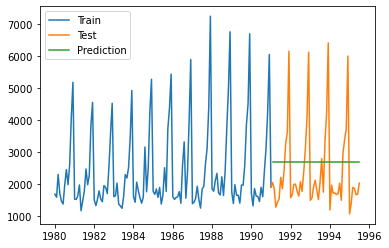

In [34]:
plt.plot(ses_train['Sparkling'], label= 'Train')
plt.plot(ses_test['Sparkling'], label= 'Test')
plt.plot(ses_test['Predict'], label= 'Prediction')
plt.legend()

In [35]:
# Evaluation
ses_rmse = mean_squared_error(test['Sparkling'], ses_pred, squared= False)
print('RMSE: {}'.format(ses_rmse))

# Creating a dataframe and storing the values
ses_rmse_result = pd.DataFrame({'RMSE': [ses_rmse]}, index= ['Simple Exp Smoothing'])

final_rmse_result_df = pd.concat([final_rmse_result_df, ses_rmse_result])
final_rmse_result_df

RMSE: 1310.6135100151616


,RMSE
Naive model,1368.563381
Simple Mean Model,1275.073671
MA_2pt,813.400684
MA_4pt,1156.589694
MA_6pt,1283.927428
MA_9pt,1346.278315
Simple Exp Smoothing,1310.613510


#### Double Exp Smoothing

In [36]:
des_train = train.copy()
des_test = test.copy()

warnings.filterwarnings('ignore')
# Initializing the model and fitting the values
des = Holt(des_train['Sparkling']).fit(optimized= True, use_brute= True)

# Getting parameters
print("The parameters: {}\n".format(des.params))

The parameters: {'smoothing_level': 0.6178571428571428, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1686.0, 'initial_trend': -95.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}



alpha = 0.6178, beta = 0.0001

In [37]:
# Forecasting the values
des_pred = des.forecast(steps= len(test))

des_test['Predict'] = des_pred

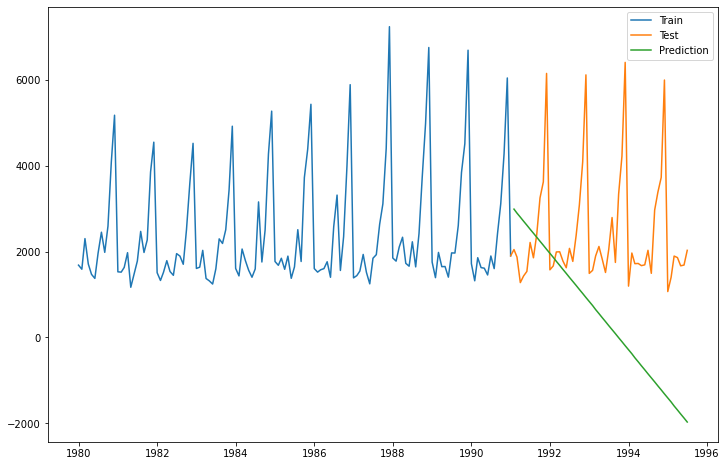

In [38]:
# Visualization
plt.figure(figsize= (12,8))
plt.plot(des_train['Sparkling'], label= 'Train')
plt.plot(des_test['Sparkling'], label= 'Test')
plt.plot(des_test['Predict'], label= 'Prediction')
plt.legend();

In [39]:
# Evaluation
des_rmse = mean_squared_error(test['Sparkling'], des_pred, squared= False)
print('RMSE: {}'.format(des_rmse))

# Creating a dataframe and storing the values
des_rmse_result = pd.DataFrame({'RMSE': [des_rmse]}, index= ['Double Exp Smoothing'])

final_rmse_result_df = pd.concat([final_rmse_result_df, des_rmse_result])
final_rmse_result_df

RMSE: 2773.9159625344014


,RMSE
Naive model,1368.563381
Simple Mean Model,1275.073671
MA_2pt,813.400684
MA_4pt,1156.589694
MA_6pt,1283.927428
MA_9pt,1346.278315
Simple Exp Smoothing,1310.613510
Double Exp Smoothing,2773.915963


#### Triple Exponential Smoothing

In [40]:
tes_train = train.copy()
tes_test = test.copy()

# Initializing the model and fitting the values
tes = ExponentialSmoothing(tes_train['Sparkling'], trend= 'additive', seasonal= 'multiplicative').fit()

In [41]:
# Getting parameters
print("The parameters are: {}\n".format(tes.params))

The parameters are: {'smoothing_level': 0.07571447293056864, 'smoothing_trend': 0.07571445297188348, 'smoothing_seasonal': 0.37656083026574544, 'damping_trend': nan, 'initial_level': 1661.8337691066668, 'initial_trend': -15.116618576679839, 'initial_seasons': array([1.01457732, 0.95738893, 1.38666231, 1.1510802 , 0.89802869,
       0.90872748, 1.24193051, 1.62616104, 1.30392114, 1.74998122,
       2.74130166, 3.50162996]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}



- alpha = 0.07571, beta = 0.07571, gamma = 0.3765

In [42]:
# Forecasting the values
tes_pred = tes.forecast(steps= len(test))

tes_test['Predict'] = tes_pred

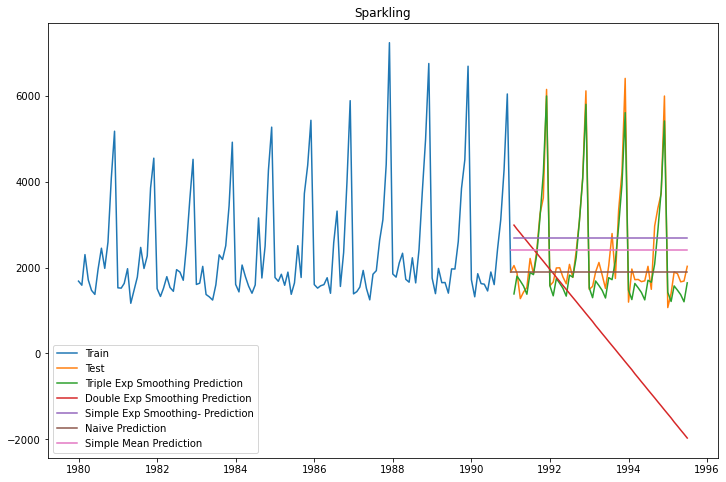

In [69]:
# Visualization the prediction
#plt.figure(figsize= (12,8))
#plt.plot(tes_train['Sparkling'], label= 'Train')
#plt.plot(tes_test['Sparkling'], label= 'Test')
#plt.plot(tes_test['Predict'], label= 'Prediction')
#plt.legend()

# Visualization
plt.figure(figsize= (12,8))
plt.plot(tes_train['Sparkling'], label= 'Train')
plt.plot(tes_test['Sparkling'], label= 'Test')
plt.plot(tes_test['Predict'], label= 'Triple Exp Smoothing Prediction')
plt.plot(des_test['Predict'], label= 'Double Exp Smoothing Prediction')
plt.plot(ses_test['Predict'], label= 'Simple Exp Smoothing- Prediction')
plt.plot(naive_test['Sparkling_Pred'], label= 'Naive Prediction')
plt.plot(simple_avg_test['Mean_forecast'], label= 'Simple Mean Prediction')
plt.title('Sparkling')
plt.legend();

In [44]:
# Evaluation
tes_rmse = mean_squared_error(test['Sparkling'], tes_pred, squared= False)
print('RMSE: {}'.format(tes_rmse))

# Creating a dataframe and storing the values
tes_rmse_result = pd.DataFrame({'RMSE': [tes_rmse],}, index= ['Triple Exp Smoothing'])

final_rmse_result_df = pd.concat([final_rmse_result_df, tes_rmse_result])
final_rmse_result_df

RMSE: 1418.3250748201422


,RMSE
Naive model,1368.563381
Simple Mean Model,1275.073671
MA_2pt,813.400684
MA_4pt,1156.589694
MA_6pt,1283.927428
MA_9pt,1346.278315
Simple Exp Smoothing,1310.613510
Double Exp Smoothing,2773.915963
Triple Exp Smoothing,1418.325075


In [45]:
from statsmodels.tsa.stattools import adfuller
# Defining a function to check if data is stationary
def check_stat(data):
    adftest = adfuller(data, regression= 'ct')
    p_val = adftest[1]
    if p_val < 0.05:
        print('The Data is stationary')
    else:
        print('The Data is not stationary')
    print('The P-value is: %3.3f'%p_val)

# Defining a function to perform 1- order differentiating
def ts_diff(data):
    adftest = adfuller(data.diff().dropna(), regression= 'ct')
    p_val = adftest[1]
    if p_val < 0.05:
        print('The Data is now stationary')
    else:
        print('The Data is still not stationary')
    print('The P-value is: %3.3f'%p_val)

In [46]:
check_stat(sparkling_df)

The Data is not stationary
The P-value is: 0.706


In [47]:
ts_diff(sparkling_df)

The Data is now stationary
The P-value is: 0.000


Therefore, Differentiating of order 1 is required for the given data to make it stationary.

##### ACF & PACF plots after differentiating

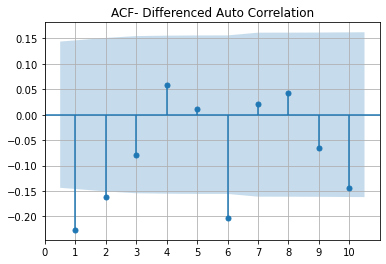

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sparkling_df.diff().dropna(),lags=10,zero= False,title="ACF- Differenced Auto Correlation")
plt.xticks(np.arange(0,11,1))
plt.grid();

q = 2

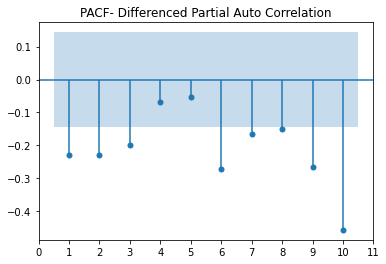

In [51]:
plot_pacf(sparkling_df.diff().dropna(), lags=10, zero= False, title="PACF- Differenced Partial Auto Correlation")
plt.xticks(np.arange(0,12,1))
plt.show()

p = 1

In [49]:
# Train test split
sarima_test = sparkling_df['1991-01-01':]
sarima_train = sparkling_df[:'1991-01-01']

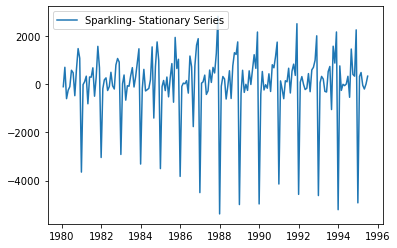

In [71]:
# Plotting Time Series after differencing
plt.plot(sparkling_df.diff().dropna(), label= 'Sparkling- Stationary Series')
plt.legend(loc= 'best');

Even after differencing, some seasonality is present. Therefore, SARIMA model should be preferred.

In [54]:
# Getting parameters for SARIMA
import itertools
p=q= range(0,4)
d = range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p,D,q))]
print('Examples of the parameter combinations of the model are:')
for i in range(1, len(pdq)):
    print('Model: {} {}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations of the model are:
Model: (0, 1, 1) (0, 0, 1, 6)
Model: (0, 1, 2) (0, 0, 2, 6)
Model: (0, 1, 3) (0, 0, 3, 6)
Model: (1, 1, 0) (1, 0, 0, 6)
Model: (1, 1, 1) (1, 0, 1, 6)
Model: (1, 1, 2) (1, 0, 2, 6)
Model: (1, 1, 3) (1, 0, 3, 6)
Model: (2, 1, 0) (2, 0, 0, 6)
Model: (2, 1, 1) (2, 0, 1, 6)
Model: (2, 1, 2) (2, 0, 2, 6)
Model: (2, 1, 3) (2, 0, 3, 6)
Model: (3, 1, 0) (3, 0, 0, 6)
Model: (3, 1, 1) (3, 0, 1, 6)
Model: (3, 1, 2) (3, 0, 2, 6)
Model: (3, 1, 3) (3, 0, 3, 6)


In [55]:
SARIMA_AIC = pd.DataFrame(columns=["param","seasonal","AIC"])
SARIMA_AIC

,param,seasonal,AIC


In [57]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in PDQ:
        sarima = sm.tsa.statespace.SARIMAX(sarima_train.diff().dropna().values, order= param, seasonal_order= param_seasonal, enforce_stationarity= False, enforce_invertibility= False)
        sarima = sarima.fit(maxiter= 1000)
        print('SARIMA {} x {} - AIC: {}'.format(param, param_seasonal, sarima.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param, 'seasonal':param_seasonal, 'AIC':sarima.aic}, ignore_index= True)

SARIMA (0, 1, 0) x (0, 0, 0, 6) - AIC: 2366.6423992946484
SARIMA (0, 1, 0) x (0, 0, 1, 6) - AIC: 2263.1915212049844
SARIMA (0, 1, 0) x (0, 0, 2, 6) - AIC: 2059.0977271164643
SARIMA (0, 1, 0) x (0, 0, 3, 6) - AIC: 1960.922098467355
SARIMA (0, 1, 0) x (1, 0, 0, 6) - AIC: 2277.4862308160004
SARIMA (0, 1, 0) x (1, 0, 1, 6) - AIC: 2213.452338591971
SARIMA (0, 1, 0) x (1, 0, 2, 6) - AIC: 2036.45325635434
SARIMA (0, 1, 0) x (1, 0, 3, 6) - AIC: 1904.4795446467588
SARIMA (0, 1, 0) x (2, 0, 0, 6) - AIC: 1956.4373066062483
SARIMA (0, 1, 0) x (2, 0, 1, 6) - AIC: 1958.3125191405356
SARIMA (0, 1, 0) x (2, 0, 2, 6) - AIC: 1934.7165916959016
SARIMA (0, 1, 0) x (2, 0, 3, 6) - AIC: 1839.0122008099331
SARIMA (0, 1, 0) x (3, 0, 0, 6) - AIC: 1857.3473488821742
SARIMA (0, 1, 0) x (3, 0, 1, 6) - AIC: 1859.3156962884223
SARIMA (0, 1, 0) x (3, 0, 2, 6) - AIC: 1854.024029659223
SARIMA (0, 1, 0) x (3, 0, 3, 6) - AIC: 1840.8459064583349
SARIMA (0, 1, 1) x (0, 0, 0, 6) - AIC: 2252.679638813781
SARIMA (0, 1, 1) x (

In [58]:
SARIMA_AIC.sort_values(by= 'AIC').head()

,param,seasonal,AIC
295,"(1, 1, 3)","(2, 0, 3, 6)",1642.297016
123,"(1, 1, 3)","(2, 0, 3, 6)",1642.297016
59,"(0, 1, 3)","(2, 0, 3, 6)",1643.125568
231,"(0, 1, 3)","(2, 0, 3, 6)",1643.125568
359,"(2, 1, 3)","(2, 0, 3, 6)",1644.106206


In [61]:
# Making new SARIMA model according to lowest AIC value
sarima = sm.tsa.statespace.SARIMAX(sarima_train.diff().dropna().values, order = (1,1,3), seasonal_order=(2,0,3,6), enforce_stationarity=False, enforce_invertibility=False)
sarima = sarima.fit(maxiter=1000)
print(sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -811.149
Date:                           Sun, 13 Nov 2022   AIC                           1642.297
Time:                                   12:36:07   BIC                           1669.210
Sample:                                        0   HQIC                          1653.211
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6975      0.312     -2.236      0.025      -1.309      -0.086
ma.L1         -1.2886      0.238     -5.423

In [62]:
# Predicting
sarima_pred = sarima.get_forecast(steps = len(sarima_test))
sarima_pred.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,-773.771921,395.628068,-1549.188685,1.644843
1,461.236683,495.332396,-509.596973,1432.070339
2,-31.056062,501.716950,-1014.403214,952.291091
3,-416.721349,505.249982,-1406.993117,573.550419
4,-177.561734,506.642468,-1170.562723,815.439255
5,701.585598,507.544226,-293.182806,1696.354002
6,-115.109110,507.729696,-1110.241028,880.022809
7,505.045900,507.773763,-490.172389,1500.264189
8,961.813535,507.943441,-33.737316,1957.364386
9,1182.150558,508.119253,186.255122,2178.045994


In [64]:
sarima_rmse = mean_squared_error(sarima_test["Sparkling"],sarima_pred.predicted_mean,squared=False)
sarima_rmse

3526.8081447155946

In [84]:
# Making new SARIMA model according to ACF & PACF values
sarima_manual = sm.tsa.statespace.SARIMAX(sarima_train['Sparkling'].values, order = (1,1,2), seasonal_order=(2,0,3,6), enforce_stationarity=False, enforce_invertibility=False)
sarima_manual = sarima_manual.fit(maxiter=1000)
print(sarima_manual.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  133
Model:             SARIMAX(1, 1, 2)x(2, 0, [1, 2, 3], 6)   Log Likelihood                -821.564
Date:                                   Sun, 13 Nov 2022   AIC                           1661.128
Time:                                           14:56:07   BIC                           1685.514
Sample:                                                0   HQIC                          1671.020
                                                   - 133                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7157      0.285     -2.508      0.012    

In [85]:
# Predicting
sarima_manual_pred = sarima_manual.get_forecast(steps = len(sarima_test))
sarima_manual_pred.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1220.281765,388.562913,458.712449,1981.851080
1,1726.728046,397.513304,947.616286,2505.839805
2,1707.781224,397.537285,928.622464,2486.939984
3,1298.636038,402.248345,510.243769,2087.028308
4,1143.741782,402.784701,354.298275,1933.185290
5,1842.727262,405.857313,1047.261544,2638.192979
6,1754.301273,410.173882,950.375238,2558.227309
7,2260.589049,413.269163,1450.596374,3070.581725
8,3230.712113,414.634817,2418.042806,4043.381420
9,4428.019639,417.147727,3610.425118,5245.614160


In [86]:
sarima_test['Pred'] = sarima_manual_pred.predicted_mean

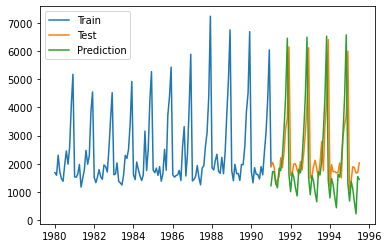

In [87]:
plt.plot(sarima_train, label= 'Train')
plt.plot(sarima_test['Sparkling'], label= 'Test')
plt.plot(sarima_test['Pred'], label= 'Prediction')
plt.legend(loc= 'best');

In [88]:
sarima_rmse_manual = mean_squared_error(sarima_test['Sparkling'], sarima_manual_pred.predicted_mean, squared= False)
sarima_rmse_manual

1598.8457820852257

In [89]:
# Creating a dataframe to store RMSE values and concatenating it into final result dataframe
keys = ['SARIMA_AIC', 'SARIMA_manual']
sarima_rmse_df = pd.DataFrame({'RMSE': [sarima_rmse, sarima_rmse_manual]}, index= keys)

final_rmse_result_df = pd.concat([final_rmse_result_df, sarima_rmse_df])
final_rmse_result_df

,RMSE
Naive model,1368.563381
Simple Mean Model,1275.073671
MA_2pt,813.400684
MA_4pt,1156.589694
MA_6pt,1283.927428
MA_9pt,1346.278315
Simple Exp Smoothing,1310.613510
Double Exp Smoothing,2773.915963
Triple Exp Smoothing,1418.325075
SARIMA_AIC,3526.808145


In [91]:
full_data_model = sm.tsa.statespace.SARIMAX(sparkling_df["Sparkling"].values,
                                                order = (1,1,2),
                                                seasonal_order=(2,0,3,6),
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, [1, 2, 3], 6)   Log Likelihood               -1216.368
Date:                                   Sun, 13 Nov 2022   AIC                           2450.737
Time:                                           15:03:39   BIC                           2478.690
Sample:                                                0   HQIC                          2462.084
                                                   - 187                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1096      0.796      0.138      0.890    

In [95]:
# Predict for 12 months into future
predicted_12_month_data = results_full_data_model.get_forecast(steps =12)

In [96]:
predicted_12_month_data.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1845.626620,376.994821,1106.730349,2584.522891
1,2403.384091,381.649103,1655.365595,3151.402587
2,3281.998875,382.576518,2532.162679,4031.835071
3,4018.341346,383.268666,3267.148564,4769.534128
4,6275.310580,383.936139,5522.809575,7027.811585
5,1222.285784,384.599921,468.483790,1976.087777
6,1565.156704,384.824979,810.913605,2319.399802
7,1754.494516,385.403643,999.117256,2509.871776
8,1786.346266,386.026328,1029.748566,2542.943966
9,1719.159920,386.653014,961.333939,2476.985902


In [97]:
pred_full_manual_SARIMA_date = predicted_12_month_data.summary_frame(alpha = 0.05).set_index(pd.date_range(start='1995-07-01',end='1996-06-30', freq='M'))

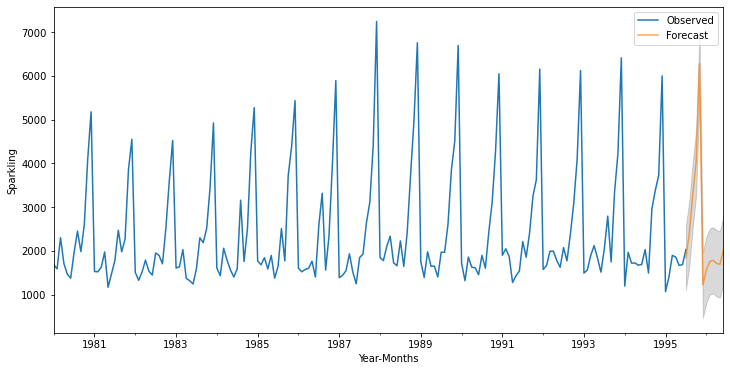

In [99]:
# plot the forecast along with the confidence band
plt.figure(figsize= (12,6))
axis = sparkling_df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()